In [19]:
from keras.datasets import fashion_mnist
(train_X,train_Y), (test_X,test_Y) = fashion_mnist.load_data()

In [20]:
import numpy as np
from keras.utils import to_categorical
import matplotlib.pyplot as plt

In [22]:
%matplotlib inline
print('Training data shape : ', train_X.shape, train_Y.shape)
print('Testing data shape : ', test_X.shape, test_Y.shape)

Training data shape :  (60000, 28, 28) (60000,)
Testing data shape :  (10000, 28, 28) (10000,)


In [23]:
# Find the unique numbers from the train labels
classes = np.unique(train_Y)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

Total number of outputs :  10
Output classes :  [0 1 2 3 4 5 6 7 8 9]


Text(0.5, 1.0, 'Test-Ground Truth : 9')

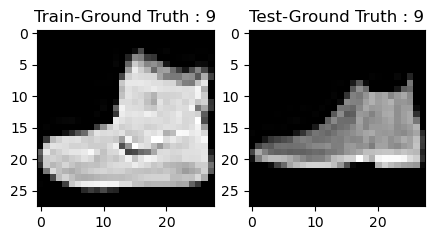

In [24]:
plt.figure(figsize=[5,5])
# Display the first image in training data
plt.subplot(121)
plt.imshow(train_X[0,:,:], cmap='gray')
plt.title("Train-Ground Truth : {}".format(train_Y[0]))
# Display the first image in testing data
plt.subplot(122)
plt.imshow(test_X[0,:,:], cmap='gray')
plt.title("Test-Ground Truth : {}".format(test_Y[0]))

In [25]:
train_X = train_X.reshape(-1, 28,28, 1)
test_X = test_X.reshape(-1, 28,28, 1)
train_X.shape, test_X.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [26]:
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')
train_X = train_X / 255.
test_X = test_X / 255.

In [27]:
# Change the labels from categorical to one-hot encoding
train_Y_one_hot = to_categorical(train_Y)
test_Y_one_hot = to_categorical(test_Y)
# Display the change for category label using one-hot encoding
print('Original label:', train_Y[31])
print('After conversion to one-hot:', train_Y_one_hot[31])

Original label: 3
After conversion to one-hot: [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


In [28]:
from sklearn.model_selection import train_test_split
train_X,valid_X,train_label,valid_label = train_test_split(train_X,
train_Y_one_hot,
test_size=0.2,
random_state=13)
train_X.shape,valid_X.shape,train_label.shape,valid_label.shape
((48000, 28, 28, 1), (12000, 28, 28, 1), (48000, 10), (12000, 10))

((48000, 28, 28, 1), (12000, 28, 28, 1), (48000, 10), (12000, 10))

### Implementar la CNN

In [30]:
import tensorflow as tf
import keras
from keras.models import Sequential
from keras import Input,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import BatchNormalization
from keras.layers import LeakyReLU

In [31]:
Batch = 64
Epochs = 20
batch_size = 64
epochs = 20
num_classes = 10

In [33]:
fashion_model = Sequential()
fashion_model.add(Conv2D(32, kernel_size=(3, 3),activation='linear', input_shape=(28,28,1),padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D((2, 2),padding='same'))
fashion_model.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
fashion_model.add(Conv2D(128, (3, 3), activation='linear',padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
fashion_model.add(Flatten())
fashion_model.add(Dense(128, activation='linear'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(Dense(num_classes, activation='softmax'))

In [38]:
fashion_model.compile(loss=keras.losses.categorical_crossentropy,
optimizer=keras.optimizers.legacy.Adam(),metrics=['accuracy']) # Se cambio a legacy.adam por el uso de procesador M2

In [39]:
fashion_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 28, 28, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 14, 14, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 64)          0         
 g2D)                                                   

In [40]:
fashion_train = fashion_model.fit(train_X, train_label, batch_size=batch_size,
epochs=epochs,verbose=1,
validation_data=(valid_X, valid_label))

Epoch 1/20
750/750 [==============================] - 12s 15ms/step - loss: 0.4678 - accuracy: 0.8290 - val_loss: 0.3299 - val_accuracy: 0.8827
Epoch 2/20
750/750 [==============================] - 12s 16ms/step - loss: 0.2911 - accuracy: 0.8939 - val_loss: 0.2806 - val_accuracy: 0.8984
Epoch 3/20
750/750 [==============================] - 13s 17ms/step - loss: 0.2422 - accuracy: 0.9111 - val_loss: 0.2452 - val_accuracy: 0.9083
Epoch 4/20
750/750 [==============================] - 13s 17ms/step - loss: 0.2093 - accuracy: 0.9226 - val_loss: 0.2558 - val_accuracy: 0.9103
Epoch 5/20
750/750 [==============================] - 14s 18ms/step - loss: 0.1851 - accuracy: 0.9313 - val_loss: 0.2346 - val_accuracy: 0.9169
Epoch 6/20
750/750 [==============================] - 15s 20ms/step - loss: 0.1608 - accuracy: 0.9394 - val_loss: 0.2396 - val_accuracy: 0.9168
Epoch 7/20
750/750 [==============================] - 14s 19ms/step - loss: 0.1402 - accuracy: 0.9478 - val_loss: 0.2300 - val_accuracy:

In [41]:
fashion_model.save("fashion_model_dropout.h5py")

INFO:tensorflow:Assets written to: fashion_model_dropout.h5py/assets


INFO:tensorflow:Assets written to: fashion_model_dropout.h5py/assets


In [42]:
test_eval = fashion_model.evaluate(test_X, test_Y_one_hot, verbose=0)
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

Test loss: 0.4597058594226837
Test accuracy: 0.9171000123023987


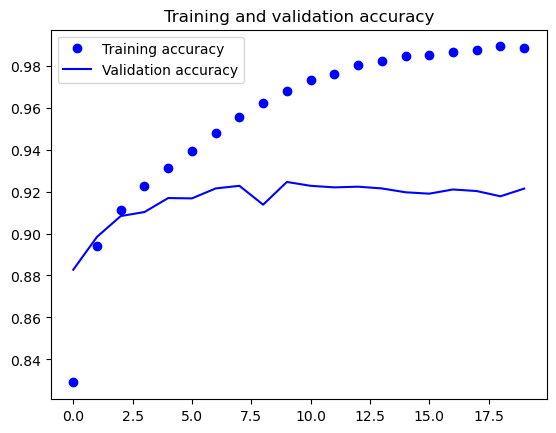

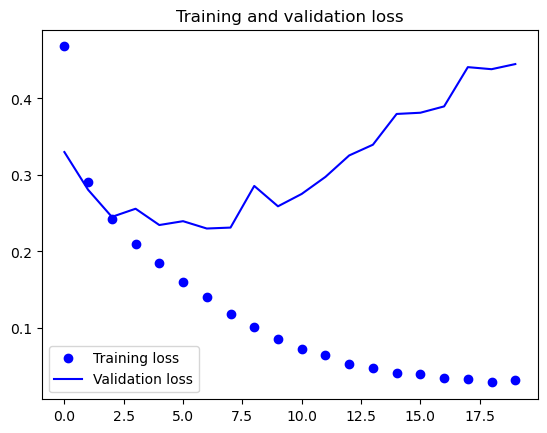

In [44]:
accuracy = fashion_train.history['accuracy']
val_accuracy = fashion_train.history['val_accuracy']
loss = fashion_train.history['loss']
val_loss = fashion_train.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [65]:
batch_size = 64
epochs = 20
num_classes = 10

In [66]:
fashion_model = Sequential()
fashion_model.add(Conv2D(64, kernel_size=(3, 3),activation='linear',padding='same',input_shape=(28,28,1)))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D((2, 2),padding='same'))
fashion_model.add(Dropout(0.25))

fashion_model.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
fashion_model.add(Dropout(0.25))

fashion_model.add(Conv2D(128, (3, 3), activation='linear',padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
fashion_model.add(Dropout(0.4))

fashion_model.add(Conv2D(256, (3, 3), activation='linear',padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
fashion_model.add(Dropout(0.3))

fashion_model.add(Flatten())
fashion_model.add(Dense(128, activation='linear'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(Dropout(0.3))
fashion_model.add(Dense(num_classes, activation='softmax'))
fashion_model.compile(loss=keras.losses.categorical_crossentropy,
optimizer=keras.optimizers.legacy.Adam(), metrics=['accuracy'])
fashion_train_dropout = fashion_model.fit(train_X, train_label,
batch_size=batch_size,
epochs=epochs,verbose=1,
validation_data=(valid_X, valid_label))

Epoch 1/20
750/750 [==============================] - 24s 32ms/step - loss: 0.6510 - accuracy: 0.7570 - val_loss: 0.3931 - val_accuracy: 0.8533
Epoch 2/20
750/750 [==============================] - 25s 33ms/step - loss: 0.3881 - accuracy: 0.8561 - val_loss: 0.3265 - val_accuracy: 0.8764
Epoch 3/20
750/750 [==============================] - 25s 34ms/step - loss: 0.3277 - accuracy: 0.8790 - val_loss: 0.2804 - val_accuracy: 0.8961
Epoch 4/20
750/750 [==============================] - 25s 34ms/step - loss: 0.3027 - accuracy: 0.8871 - val_loss: 0.2551 - val_accuracy: 0.9053
Epoch 5/20
750/750 [==============================] - 26s 34ms/step - loss: 0.2833 - accuracy: 0.8937 - val_loss: 0.2409 - val_accuracy: 0.9088
Epoch 6/20
750/750 [==============================] - 25s 33ms/step - loss: 0.2711 - accuracy: 0.8976 - val_loss: 0.2389 - val_accuracy: 0.9092
Epoch 7/20
750/750 [==============================] - 25s 33ms/step - loss: 0.2596 - accuracy: 0.9030 - val_loss: 0.2378 - val_accuracy:

In [67]:
fashion_model.save("fashion_model_dropout.h5py")

INFO:tensorflow:Assets written to: fashion_model_dropout.h5py/assets


INFO:tensorflow:Assets written to: fashion_model_dropout.h5py/assets


In [68]:
test_eval = fashion_model.evaluate(test_X, test_Y_one_hot, verbose=0)
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

Test loss: 0.22973991930484772
Test accuracy: 0.9210000038146973


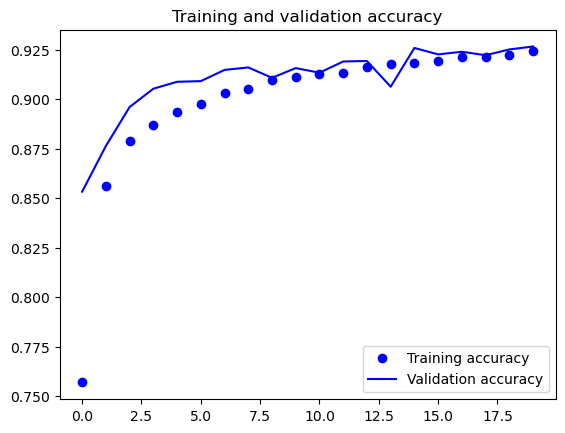

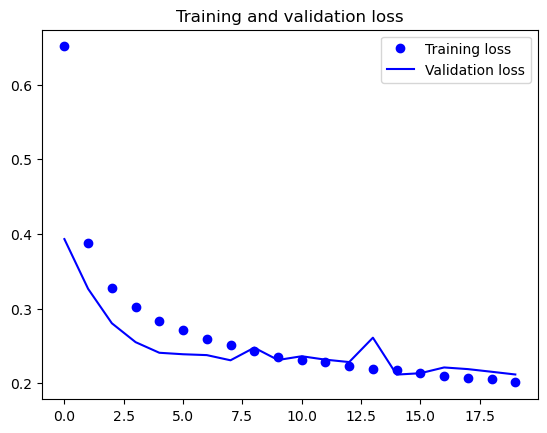

In [69]:
accuracy = fashion_train_dropout.history['accuracy']
val_accuracy = fashion_train_dropout.history['val_accuracy']
loss = fashion_train_dropout.history['loss']
val_loss = fashion_train_dropout.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [70]:
predicted_classes = fashion_model.predict(test_X)
predicted_classes = np.argmax(np.round(predicted_classes),axis=1)
predicted_classes.shape, test_Y.shape

313/313 [==============================] - 2s 6ms/step


((10000,), (10000,))

Found 9185 correct labels


/var/folders/y1/nsw2h6qd4l3407yyy_3z_xx00000gn/T/ipykernel_52900/2504418358.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3,3,i+1)


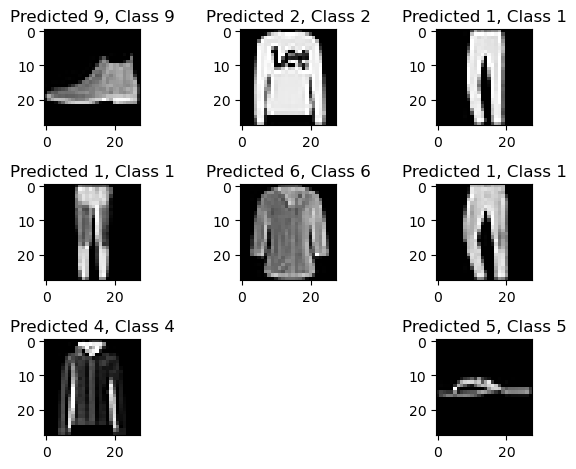

In [71]:
correct = np.where(predicted_classes==test_Y)[0]
print ("Found %d correct labels" % len(correct))
for i, correct in enumerate(correct[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_X[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct],
    test_Y[correct]))
    plt.tight_layout()

Found 815 incorrect labels


/var/folders/y1/nsw2h6qd4l3407yyy_3z_xx00000gn/T/ipykernel_52900/856351750.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3,3,i+1)


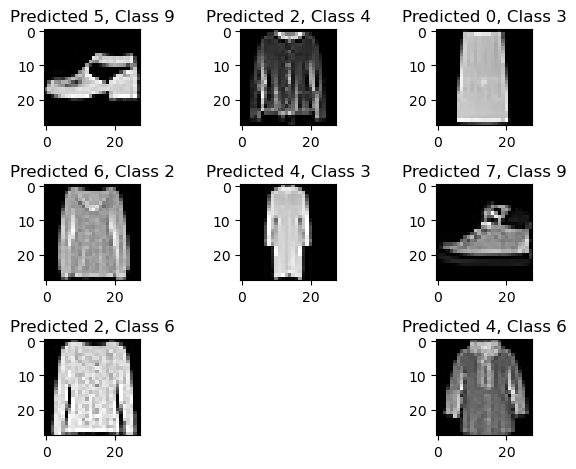

In [72]:
incorrect = np.where(predicted_classes!=test_Y)[0]
print ("Found %d incorrect labels" % len(incorrect))
for i, incorrect in enumerate(incorrect[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_X[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect],
    test_Y[incorrect]))
    plt.tight_layout()

In [73]:
from sklearn.metrics import classification_report
target_names = ["Class {}".format(i) for i in range(num_classes)]
print(classification_report(test_Y, predicted_classes,
target_names=target_names))

              precision    recall  f1-score   support

     Class 0       0.81      0.87      0.84      1000
     Class 1       0.99      0.98      0.99      1000
     Class 2       0.89      0.87      0.88      1000
     Class 3       0.96      0.89      0.92      1000
     Class 4       0.84      0.89      0.87      1000
     Class 5       0.99      0.98      0.98      1000
     Class 6       0.79      0.77      0.78      1000
     Class 7       0.95      0.99      0.97      1000
     Class 8       0.99      0.99      0.99      1000
     Class 9       0.98      0.96      0.97      1000

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000

